Using TensorFlow backend.


(60000, 28, 28, 1)
(10000, 28, 28, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7,

NameError: name 'verbose非常重要' is not defined

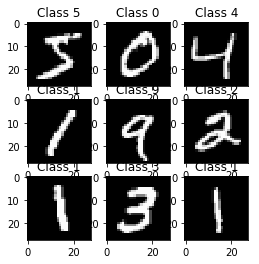

In [2]:
get_ipython().magic('matplotlib inline')


import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

np.random.seed(25)


# 下載 mnist 資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train: trainning data
# y_train: labels of each trainning data
# x_test: testing data
# y_test: labels of each testing data

plt.figure(figsize=(4,4))

#畫圖
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title("Class %s" %y_train[i])


# add channel  開始為 CNN 準備  矩陣要變成 (資料筆數, 長, 寬, 黑白=1/彩色=3)
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
print(x_train.shape)#28,28,1
print(x_test.shape)
x_train_normalized = x_train / 255#(normalized是壓縮到0~1之間是叫常態化)
x_test_normalized = x_test / 255


def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()


from keras.utils import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator

#第一個改filter，第二個改層數，第三個改dropout
#relu可以自己去改，padding可要可不要
model = Sequential()
model.add(Conv2D(32, (5,5), activation="relu", padding="same", data_format="channels_last", input_shape=(28,28,1)))
#加了一層convolution
model.add(Conv2D(32, (5,5), activation="relu", padding="same", data_format="channels_last", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))
model.add(Dropout(0.25))#random方式取0.25 weight降低overfitting機率


model.add(Conv2D(64, (3,3), activation="relu", padding="same", data_format="channels_last"))
model.add(Conv2D(64, (3,3), activation="relu", padding="same", data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))


layer_utils.print_summary(model)


# 定義訓練方式
# loss function: 交叉熵
# optimizer: Adam
# 評估模型: 準確率
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


# 開始訓練
y_train_onehot = np_utils.to_categorical(y_train)
#train_history = model.fit_generator(train_generator, steps_per_epoch=60000//300, epochs=10, 
#                    validation_data=test_generator, validation_steps=10000//300)
train_history = model.fit(x_train_normalized, y_train_onehot, validation_split=0.2, epochs=10, batch_size=300, verbose=1)
#verbose非常重要


show_train_history(train_history, 'acc', 'val_acc')

show_train_history(train_history, 'loss', 'val_loss')

y_test_onehot = np_utils.to_categorical(y_test)
score = model.evaluate(x_test, y_test_onehot)
print()
print("Accuracy {}%".format(score[1]))

results = model.predict_classes(x_test)
print()
print(results)





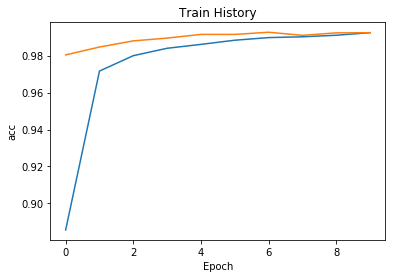

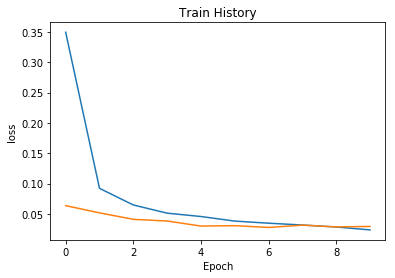

10000/10000 [==============================] - 9s 871us/step

Accuracy 0.9931%

[7 2 1 ... 4 5 6]


In [3]:

show_train_history(train_history, 'acc', 'val_acc')

show_train_history(train_history, 'loss', 'val_loss')

y_test_onehot = np_utils.to_categorical(y_test)
score = model.evaluate(x_test, y_test_onehot)
print()
print("Accuracy {}%".format(score[1]))

results = model.predict_classes(x_test)
print()
print(results)

In [5]:

import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



C:\Users\USER\Anaconda3.71016\envs\tensorflow\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


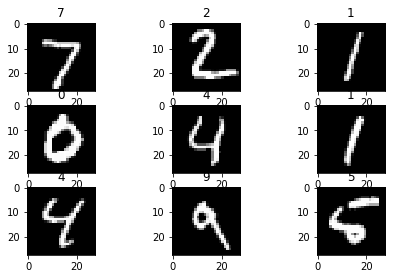

In [6]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, results)

plot_confusion_matrix(cm, range(0, 9))


incorrect = np.where(y_test != results)[0]
test_set = np.squeeze(x_test, axis=3)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    idx = incorrect[i]
    img = test_set[idx]
    plt.imshow(img, cmap="gray")
    plt.title("{}/{}".format(y_test[idx], results[idx]))

correct = np.where(y_test == results)[0]
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    idx = correct[i]
    img = test_set[idx]
    plt.imshow(img, cmap="gray")
    plt.title("{}".format(y_test[idx]))


model.save_weights("cnn.h5")

# 第三個檔案

(48000, 28, 28, 1)
(10000, 28, 28, 1)


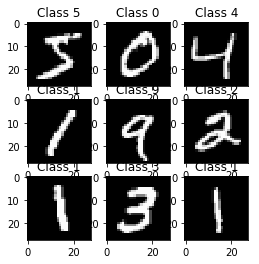

In [7]:

# coding: utf-8

get_ipython().magic('matplotlib inline')


import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

np.random.seed(25)


# 下載 mnist 資料
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train: trainning data
# y_train: labels of each trainning data
# x_test: testing data
# y_test: labels of each testing data

plt.figure(figsize=(4,4))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title("Class %s" %y_train[i])


# add channel  開始為 CNN 準備  矩陣要變成 (資料筆數, 長, 寬, 黑白=1/彩色=3)
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

## 手動將 mnist 的訓練資料依 80%/20% 的比例分做訓練及驗證資料
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=25) 
#手動切出驗證集，test_size = 0.2，驗證集2成，隨機種子隨機抽
#No_shuffle

print(x_train.shape)
print(x_test.shape)
x_train_normalized = x_train / 255
x_val_normalized = x_val / 255
x_test_normalized = x_test / 255

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()



In [8]:

from keras.utils import *
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator


model = Sequential()
model.add(Conv2D(16, (5,5), activation="relu", padding="same", data_format="channels_last", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))

model.add(Conv2D(36, (5,5), activation="relu", padding="same", data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_last"))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

layer_utils.print_summary(model)


# 定義訓練方式
# loss function: 交叉熵
# optimizer: Adam
# 評估模型: 準確率
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

## 手動將 mnist 的訓練資料依 80%/20% 的比例分做訓練及驗證資料
## from sklearn.model_selection import train_test_split
## x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=25) 
# 開始訓練
y_train_onehot = np_utils.to_categorical(y_train)

y_val_onehot = np_utils.to_categorical(y_val)


## 訓練資料開始做一些調整轉換

## rotation_range: 定義影像旋轉的角度區間，generator 會亂數來決定選轉角度
## width_shift_range: 定義影像橫向偏移位置多寡，generator 會亂數決定偏移量
## height_shift_range: 定義影像縱向偏移位置多寡，generator 會亂數決定偏移量
## shear_range: 定義錯切角度
## zoom_range: 定義放大縮小多寡

#副程式放在gen裡面(改結構)
gen = ImageDataGenerator(featurewise_center=False,
                         samplewise_center=False,
                         rotation_range=8, 
                         width_shift_range=0.08, 
                         shear_range=0.3,
                         height_shift_range=0.08, 
                         zoom_range=0.08,
                         data_format="channels_last")

## fit() 計算依賴於資料的變換所需要的統計資訊(均值方差等),只有使用featurewise_center，featurewise_std_normalization或zca_whitening時需要此函數。

gen.fit(x_train_normalized)

## 接收numpy陣列和標籤為參數,生成經過資料提升或標準化後的batch資料,並在一個無限迴圈中不斷的返回batch資料

train_generator = gen.flow(x_train_normalized, y_train_onehot, batch_size=300)  ## 根據 ImageDataGenerator 產生更多影像資料

test_gen = ImageDataGenerator(data_format="channels_last")
test_gen.fit(x_test_normalized)
test_generator = test_gen.flow(x_test_normalized, y_test, batch_size=300)


from keras.callbacks import ReduceLROnPlateau
## 訓練時依條件降低學習率。
## 說明：監控val_loss，在該數值等待10次，若無較好表現則調降學習率，但最低若為0.0001，則不在調降。
## keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', epsilon=0.0001, cooldown=0, 
## min_lr=0.0001)

## monitor：被監測的量
## factor：每次減少學習率的因子，學習率將以lr=lr*factor的形式減少
## patience：當patience個epoch過去而模型性能不提升時，學習率減少的動作會被觸發
## mode：’auto’, ‘min’, ‘max’之一，在min模式下，如果檢測值不再降低，則觸發學習率減少。在max模式下，當檢測值不再上升則觸##發學習率減少。
## epsilon：閾值，用來確定是否進入檢測值的“平原區“
## cooldown：學習率減少後，會經過cooldown個epoch才重新進行正常操作
## min_lr：學習率的下限

#learning_rate應該隨著iteration遞減
learning_rate_function = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, #準確率重複3次就要減少
                                            verbose=1, 
                                            factor=0.5, #準確率乘上factor設成下一個learning_rate
                                            min_lr=0.00001) #降到最小值


# 開始訓練
train_history = model.fit_generator(train_generator, 
                                    steps_per_epoch=300, 
                                    epochs=30, 
                                    verbose=1,
                                    validation_data=(x_val, y_val_onehot), #validation自己挑，不是電腦選
                                    callbacks=[learning_rate_function])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               225920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

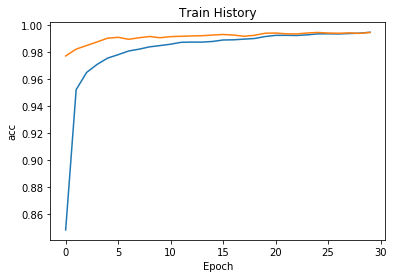

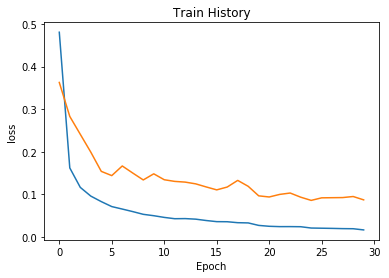

10000/10000 [==============================] - 4s 435us/step

Accuracy 0.9952%

[7 2 1 ... 4 5 6]


C:\Users\USER\Anaconda3.71016\envs\tensorflow\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


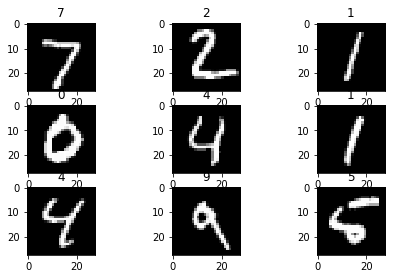

In [9]:
#train_history = model.fit(x_train_normalized, y_train_onehot, validation_split=0.2, epochs=10, batch_size=300, verbose=1)#電腦選


show_train_history(train_history, 'acc', 'val_acc')

show_train_history(train_history, 'loss', 'val_loss')

y_test_onehot = np_utils.to_categorical(y_test)
score = model.evaluate(x_test, y_test_onehot)
print()
print("Accuracy {}%".format(score[1]))

results = model.predict_classes(x_test)
print()
print(results)


import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, results)

plot_confusion_matrix(cm, range(0, 9))

incorrect = np.where(y_test != results)[0]
test_set = np.squeeze(x_test, axis=3)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    idx = incorrect[i]
    img = test_set[idx]
    plt.imshow(img, cmap="gray")
    plt.title("{}/{}".format(y_test[idx], results[idx]))



correct = np.where(y_test == results)[0]
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    idx = correct[i]
    img = test_set[idx]
    plt.imshow(img, cmap="gray")
    plt.title("{}".format(y_test[idx]))


model.save_weights("cnn2.h5")


# airline

In [10]:
# Compatibility layer between Python 2 and Python 3
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils

# %%
#Normalization  
def feature_normalize(train):
    train_norm = train.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))  #常態化(介於0~1之間)
    return train_norm





## 很重要  切割視窗
def create_segments_and_labels(df, time_steps, step):
#step是往前預測幾步
#0~12預測13
    N_FEATURES = 1
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps-1, step):
        xs = df.values[i: i + time_steps]
        rate = (df.values[i + time_steps]-df.values[i + time_steps-1])/df.values[i + time_steps-1]#因為CNN y是類別，所以會轉換
        #下一期會比現在增加或減少多少
#rate = df.values[i + time_steps]-df.values[i + time_steps-1]
        temp = rate
        if temp < 0:
            if temp <= -0.2:
                label =0
            elif temp <= -0.1:
                label =1
            elif temp < 0:
                label =2
        else:
            if temp == 0:
                label =3
            elif temp <= 0.1:
                label =4
            elif temp <= 0.2:
                label =5                
            elif temp >0.2:
                label =6              
 
        segments.append([xs])
        labels.append([label])

    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

# ------- THE PROGRAM TO LOAD DATA AND TRAIN THE MODEL -------


# Set some standard parameters upfront
pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
plt.style.use('ggplot')
print('keras version ', keras.__version__)

# The number of steps within one time segment
TIME_PERIODS = 12
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 1

# %%

print("\n--- Load, inspect and transform data ---\n")

# Load data set containing all the data from csv
df = pd.read_csv('D:/airline.csv',encoding='Big5')    #編碼為Big5
cols=['passenger']       #命名欄位
df =df[cols]                                      #將欄位名稱放入資料中          


# %%

print("\n--- Reshape the data into segments ---\n")

# Normalize features for training data set
df_train= feature_normalize(df)


# Reshape the training data into segments
# so that they can be processed by the network


#df_train= df

x_train, y_train = create_segments_and_labels(df_train, TIME_PERIODS, STEP_DISTANCE)




keras version  2.2.3

--- Load, inspect and transform data ---


--- Reshape the data into segments ---




--- Reshape data to be accepted by Keras ---

x_train shape:  (131, 12, 1)
131 training samples
y_train shape:  (131, 1)
x_train shape: (131, 12)
input_shape: 12

--- Create neural network model ---

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               3328      
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 1799      
Total params: 5,127
Trainable params: 5,127
Non-trainable params: 0
_________________________________________________________________
None
Train on 96 samples, validate on 24 samples
Epoch 1/1500
 - 0s - loss: 1.9437 - acc: 0.1771 - val_loss: 1.9085 - val_acc: 0.2500
Epoch 2/1500
 - 0s - loss: 1.9114 - acc: 0.3125 - val_loss: 1.8669 - val_acc: 0.2083
Epoch 3/1500
 - 0s - loss: 1.8842 - acc: 0.3021 - val_loss: 1.8362 - val_acc: 0.3333
Epoch 4/1500
 - 0s - loss: 1.86

Epoch 87/1500
 - 0s - loss: 1.3194 - acc: 0.4688 - val_loss: 1.4683 - val_acc: 0.4167
Epoch 88/1500
 - 0s - loss: 1.3164 - acc: 0.4583 - val_loss: 1.4603 - val_acc: 0.3750
Epoch 89/1500
 - 0s - loss: 1.3150 - acc: 0.4688 - val_loss: 1.4510 - val_acc: 0.4583
Epoch 90/1500
 - 0s - loss: 1.3106 - acc: 0.4688 - val_loss: 1.4363 - val_acc: 0.5417
Epoch 91/1500
 - 0s - loss: 1.3088 - acc: 0.4688 - val_loss: 1.4520 - val_acc: 0.5417
Epoch 92/1500
 - 0s - loss: 1.3064 - acc: 0.4792 - val_loss: 1.4733 - val_acc: 0.4583
Epoch 93/1500
 - 0s - loss: 1.3035 - acc: 0.4792 - val_loss: 1.4530 - val_acc: 0.4167
Epoch 94/1500
 - 0s - loss: 1.2989 - acc: 0.4688 - val_loss: 1.4619 - val_acc: 0.3750
Epoch 95/1500
 - 0s - loss: 1.3025 - acc: 0.4583 - val_loss: 1.5044 - val_acc: 0.4167
Epoch 96/1500
 - 0s - loss: 1.2956 - acc: 0.4688 - val_loss: 1.4832 - val_acc: 0.3750
Epoch 97/1500
 - 0s - loss: 1.2907 - acc: 0.4688 - val_loss: 1.4451 - val_acc: 0.4583
Epoch 98/1500
 - 0s - loss: 1.2938 - acc: 0.4583 - val

Epoch 182/1500
 - 0s - loss: 1.0957 - acc: 0.5521 - val_loss: 1.4205 - val_acc: 0.5000
Epoch 183/1500
 - 0s - loss: 1.0945 - acc: 0.5625 - val_loss: 1.4393 - val_acc: 0.5000
Epoch 184/1500
 - 0s - loss: 1.0951 - acc: 0.5521 - val_loss: 1.4259 - val_acc: 0.5000
Epoch 185/1500
 - 0s - loss: 1.0952 - acc: 0.5521 - val_loss: 1.4073 - val_acc: 0.5833
Epoch 186/1500
 - 0s - loss: 1.0931 - acc: 0.5625 - val_loss: 1.4330 - val_acc: 0.5000
Epoch 187/1500
 - 0s - loss: 1.0920 - acc: 0.5625 - val_loss: 1.4263 - val_acc: 0.5000
Epoch 188/1500
 - 0s - loss: 1.0842 - acc: 0.5625 - val_loss: 1.3955 - val_acc: 0.5833
Epoch 189/1500
 - 0s - loss: 1.0855 - acc: 0.5521 - val_loss: 1.4113 - val_acc: 0.5833
Epoch 190/1500
 - 0s - loss: 1.0804 - acc: 0.5521 - val_loss: 1.4207 - val_acc: 0.5000
Epoch 191/1500
 - 0s - loss: 1.0834 - acc: 0.5625 - val_loss: 1.4089 - val_acc: 0.5833
Epoch 192/1500
 - 0s - loss: 1.0783 - acc: 0.5521 - val_loss: 1.4265 - val_acc: 0.5000
Epoch 193/1500
 - 0s - loss: 1.0755 - acc: 

 - 0s - loss: 0.9330 - acc: 0.6458 - val_loss: 1.3656 - val_acc: 0.5833
Epoch 277/1500
 - 0s - loss: 0.9347 - acc: 0.6354 - val_loss: 1.3787 - val_acc: 0.5833
Epoch 278/1500
 - 0s - loss: 0.9328 - acc: 0.6458 - val_loss: 1.3749 - val_acc: 0.5833
Epoch 279/1500
 - 0s - loss: 0.9327 - acc: 0.6458 - val_loss: 1.3546 - val_acc: 0.6250
Epoch 280/1500
 - 0s - loss: 0.9319 - acc: 0.6458 - val_loss: 1.3523 - val_acc: 0.5833
Epoch 281/1500
 - 0s - loss: 0.9325 - acc: 0.6354 - val_loss: 1.3671 - val_acc: 0.5833
Epoch 282/1500
 - 0s - loss: 0.9300 - acc: 0.6458 - val_loss: 1.3805 - val_acc: 0.5833
Epoch 283/1500
 - 0s - loss: 0.9287 - acc: 0.6458 - val_loss: 1.3796 - val_acc: 0.5833
Epoch 284/1500
 - 0s - loss: 0.9341 - acc: 0.6562 - val_loss: 1.3305 - val_acc: 0.6250
Epoch 285/1500
 - 0s - loss: 0.9263 - acc: 0.6458 - val_loss: 1.3551 - val_acc: 0.5833
Epoch 286/1500
 - 0s - loss: 0.9265 - acc: 0.6667 - val_loss: 1.3564 - val_acc: 0.5833
Epoch 287/1500
 - 0s - loss: 0.9202 - acc: 0.6562 - val_lo

Epoch 371/1500
 - 0s - loss: 0.8184 - acc: 0.7292 - val_loss: 1.2589 - val_acc: 0.6667
Epoch 372/1500
 - 0s - loss: 0.8204 - acc: 0.7292 - val_loss: 1.2917 - val_acc: 0.6667
Epoch 373/1500
 - 0s - loss: 0.8154 - acc: 0.6979 - val_loss: 1.3050 - val_acc: 0.6667
Epoch 374/1500
 - 0s - loss: 0.8199 - acc: 0.6979 - val_loss: 1.3294 - val_acc: 0.6667
Epoch 375/1500
 - 0s - loss: 0.8189 - acc: 0.7188 - val_loss: 1.2978 - val_acc: 0.6667
Epoch 376/1500
 - 0s - loss: 0.8120 - acc: 0.7292 - val_loss: 1.2902 - val_acc: 0.6667
Epoch 377/1500
 - 0s - loss: 0.8143 - acc: 0.7187 - val_loss: 1.3201 - val_acc: 0.6667
Epoch 378/1500
 - 0s - loss: 0.8156 - acc: 0.7083 - val_loss: 1.3420 - val_acc: 0.6667
Epoch 379/1500
 - 0s - loss: 0.8169 - acc: 0.6979 - val_loss: 1.3712 - val_acc: 0.6250
Epoch 380/1500
 - 0s - loss: 0.8127 - acc: 0.6979 - val_loss: 1.2634 - val_acc: 0.7083
Epoch 381/1500
 - 0s - loss: 0.8173 - acc: 0.7187 - val_loss: 1.3083 - val_acc: 0.6250
Epoch 382/1500
 - 0s - loss: 0.8262 - acc: 

Epoch 466/1500
 - 0s - loss: 0.7456 - acc: 0.7500 - val_loss: 1.2755 - val_acc: 0.7917
Epoch 467/1500
 - 0s - loss: 0.7460 - acc: 0.7292 - val_loss: 1.4040 - val_acc: 0.6667
Epoch 468/1500
 - 0s - loss: 0.7369 - acc: 0.7188 - val_loss: 1.2420 - val_acc: 0.7917
Epoch 469/1500
 - 0s - loss: 0.7414 - acc: 0.7604 - val_loss: 1.2789 - val_acc: 0.7500
Epoch 470/1500
 - 0s - loss: 0.7371 - acc: 0.7396 - val_loss: 1.3798 - val_acc: 0.6250
Epoch 471/1500
 - 0s - loss: 0.7347 - acc: 0.7396 - val_loss: 1.2933 - val_acc: 0.7917
Epoch 472/1500
 - 0s - loss: 0.7356 - acc: 0.7708 - val_loss: 1.2505 - val_acc: 0.7917
Epoch 473/1500
 - 0s - loss: 0.7318 - acc: 0.7292 - val_loss: 1.3261 - val_acc: 0.7083
Epoch 474/1500
 - 0s - loss: 0.7333 - acc: 0.7396 - val_loss: 1.3299 - val_acc: 0.7917
Epoch 475/1500
 - 0s - loss: 0.7325 - acc: 0.7396 - val_loss: 1.3227 - val_acc: 0.7500
Epoch 476/1500
 - 0s - loss: 0.7317 - acc: 0.7396 - val_loss: 1.3021 - val_acc: 0.7917
Epoch 477/1500
 - 0s - loss: 0.7343 - acc: 

Epoch 561/1500
 - 0s - loss: 0.6800 - acc: 0.7604 - val_loss: 1.3485 - val_acc: 0.7500
Epoch 562/1500
 - 0s - loss: 0.6775 - acc: 0.7500 - val_loss: 1.2688 - val_acc: 0.7917
Epoch 563/1500
 - 0s - loss: 0.6761 - acc: 0.7500 - val_loss: 1.3182 - val_acc: 0.7500
Epoch 564/1500
 - 0s - loss: 0.6758 - acc: 0.7500 - val_loss: 1.2678 - val_acc: 0.7500
Epoch 565/1500
 - 0s - loss: 0.6754 - acc: 0.7604 - val_loss: 1.3500 - val_acc: 0.7500
Epoch 566/1500
 - 0s - loss: 0.6805 - acc: 0.7708 - val_loss: 1.1860 - val_acc: 0.7917
Epoch 567/1500
 - 0s - loss: 0.6749 - acc: 0.7708 - val_loss: 1.2742 - val_acc: 0.7917
Epoch 568/1500
 - 0s - loss: 0.6691 - acc: 0.7604 - val_loss: 1.3479 - val_acc: 0.7500
Epoch 569/1500
 - 0s - loss: 0.6710 - acc: 0.7604 - val_loss: 1.2615 - val_acc: 0.7917
Epoch 570/1500
 - 0s - loss: 0.6704 - acc: 0.7604 - val_loss: 1.2611 - val_acc: 0.7917
Epoch 571/1500
 - 0s - loss: 0.6662 - acc: 0.7708 - val_loss: 1.2505 - val_acc: 0.7917
Epoch 572/1500
 - 0s - loss: 0.6703 - acc: 

Epoch 656/1500
 - 0s - loss: 0.6281 - acc: 0.7604 - val_loss: 1.3089 - val_acc: 0.7917
Epoch 657/1500
 - 0s - loss: 0.6235 - acc: 0.7604 - val_loss: 1.2744 - val_acc: 0.7500
Epoch 658/1500
 - 0s - loss: 0.6227 - acc: 0.7604 - val_loss: 1.2999 - val_acc: 0.7500
Epoch 659/1500
 - 0s - loss: 0.6223 - acc: 0.7500 - val_loss: 1.3310 - val_acc: 0.7500
Epoch 660/1500
 - 0s - loss: 0.6210 - acc: 0.7500 - val_loss: 1.2563 - val_acc: 0.7917
Epoch 661/1500
 - 0s - loss: 0.6211 - acc: 0.7604 - val_loss: 1.2331 - val_acc: 0.7917
Epoch 662/1500
 - 0s - loss: 0.6213 - acc: 0.7604 - val_loss: 1.3017 - val_acc: 0.7083
Epoch 663/1500
 - 0s - loss: 0.6201 - acc: 0.7604 - val_loss: 1.2617 - val_acc: 0.7500
Epoch 664/1500
 - 0s - loss: 0.6253 - acc: 0.7500 - val_loss: 1.3061 - val_acc: 0.7917
Epoch 665/1500
 - 0s - loss: 0.6296 - acc: 0.7604 - val_loss: 1.2221 - val_acc: 0.7500
Epoch 666/1500
 - 0s - loss: 0.6219 - acc: 0.7813 - val_loss: 1.3697 - val_acc: 0.7500
Epoch 667/1500
 - 0s - loss: 0.6303 - acc: 

Epoch 751/1500
 - 0s - loss: 0.5811 - acc: 0.7708 - val_loss: 1.2758 - val_acc: 0.7917
Epoch 752/1500
 - 0s - loss: 0.5894 - acc: 0.7812 - val_loss: 1.3332 - val_acc: 0.7500
Epoch 753/1500
 - 0s - loss: 0.5806 - acc: 0.8021 - val_loss: 1.3330 - val_acc: 0.7917
Epoch 754/1500
 - 0s - loss: 0.5807 - acc: 0.7813 - val_loss: 1.3594 - val_acc: 0.7917
Epoch 755/1500
 - 0s - loss: 0.5860 - acc: 0.7604 - val_loss: 1.2724 - val_acc: 0.7500
Epoch 756/1500
 - 0s - loss: 0.5749 - acc: 0.7812 - val_loss: 1.3117 - val_acc: 0.7500
Epoch 757/1500
 - 0s - loss: 0.5852 - acc: 0.7812 - val_loss: 1.3750 - val_acc: 0.7917
Epoch 758/1500
 - 0s - loss: 0.5814 - acc: 0.7708 - val_loss: 1.3073 - val_acc: 0.7500
Epoch 759/1500
 - 0s - loss: 0.5758 - acc: 0.7604 - val_loss: 1.2766 - val_acc: 0.7500
Epoch 760/1500
 - 0s - loss: 0.5768 - acc: 0.7708 - val_loss: 1.3088 - val_acc: 0.7500
Epoch 761/1500
 - 0s - loss: 0.5751 - acc: 0.7812 - val_loss: 1.2582 - val_acc: 0.7917
Epoch 762/1500
 - 0s - loss: 0.5781 - acc: 

Epoch 846/1500
 - 0s - loss: 0.5422 - acc: 0.8125 - val_loss: 1.3419 - val_acc: 0.7500
Epoch 847/1500
 - 0s - loss: 0.5399 - acc: 0.8021 - val_loss: 1.2975 - val_acc: 0.7500
Epoch 848/1500
 - 0s - loss: 0.5375 - acc: 0.8125 - val_loss: 1.3192 - val_acc: 0.7500
Epoch 849/1500
 - 0s - loss: 0.5391 - acc: 0.7917 - val_loss: 1.3457 - val_acc: 0.7500
Epoch 850/1500
 - 0s - loss: 0.5394 - acc: 0.8021 - val_loss: 1.3061 - val_acc: 0.7500
Epoch 851/1500
 - 0s - loss: 0.5345 - acc: 0.8125 - val_loss: 1.2964 - val_acc: 0.7500
Epoch 852/1500
 - 0s - loss: 0.5385 - acc: 0.7917 - val_loss: 1.2819 - val_acc: 0.7500
Epoch 853/1500
 - 0s - loss: 0.5430 - acc: 0.8229 - val_loss: 1.3794 - val_acc: 0.7500
Epoch 854/1500
 - 0s - loss: 0.5432 - acc: 0.8021 - val_loss: 1.2712 - val_acc: 0.7500
Epoch 855/1500
 - 0s - loss: 0.5355 - acc: 0.7604 - val_loss: 1.2602 - val_acc: 0.7500
Epoch 856/1500
 - 0s - loss: 0.5392 - acc: 0.7917 - val_loss: 1.2940 - val_acc: 0.7500
Epoch 857/1500
 - 0s - loss: 0.5428 - acc: 

Epoch 941/1500
 - 0s - loss: 0.5059 - acc: 0.8125 - val_loss: 1.3288 - val_acc: 0.7500
Epoch 942/1500
 - 0s - loss: 0.5016 - acc: 0.8125 - val_loss: 1.2970 - val_acc: 0.7500
Epoch 943/1500
 - 0s - loss: 0.4998 - acc: 0.8229 - val_loss: 1.3302 - val_acc: 0.7500
Epoch 944/1500
 - 0s - loss: 0.4979 - acc: 0.8229 - val_loss: 1.2970 - val_acc: 0.7500
Epoch 945/1500
 - 0s - loss: 0.5013 - acc: 0.8229 - val_loss: 1.2387 - val_acc: 0.7500
Epoch 946/1500
 - 0s - loss: 0.4993 - acc: 0.8125 - val_loss: 1.4078 - val_acc: 0.7500
Epoch 947/1500
 - 0s - loss: 0.4994 - acc: 0.8229 - val_loss: 1.3303 - val_acc: 0.7500
Epoch 948/1500
 - 0s - loss: 0.4997 - acc: 0.8333 - val_loss: 1.2961 - val_acc: 0.7500
Epoch 949/1500
 - 0s - loss: 0.5001 - acc: 0.8229 - val_loss: 1.3175 - val_acc: 0.7500
Epoch 950/1500
 - 0s - loss: 0.5026 - acc: 0.8229 - val_loss: 1.4726 - val_acc: 0.7500
Epoch 951/1500
 - 0s - loss: 0.4968 - acc: 0.8229 - val_loss: 1.2435 - val_acc: 0.7500
Epoch 952/1500
 - 0s - loss: 0.4986 - acc: 

Epoch 1035/1500
 - 0s - loss: 0.4629 - acc: 0.8333 - val_loss: 1.2739 - val_acc: 0.7500
Epoch 1036/1500
 - 0s - loss: 0.4717 - acc: 0.8229 - val_loss: 1.3451 - val_acc: 0.7500
Epoch 1037/1500
 - 0s - loss: 0.4657 - acc: 0.8125 - val_loss: 1.3749 - val_acc: 0.7500
Epoch 1038/1500
 - 0s - loss: 0.4705 - acc: 0.8333 - val_loss: 1.3863 - val_acc: 0.7500
Epoch 1039/1500
 - 0s - loss: 0.4673 - acc: 0.8125 - val_loss: 1.2797 - val_acc: 0.7500
Epoch 1040/1500
 - 0s - loss: 0.4655 - acc: 0.8229 - val_loss: 1.3602 - val_acc: 0.7500
Epoch 1041/1500
 - 0s - loss: 0.4689 - acc: 0.8125 - val_loss: 1.4098 - val_acc: 0.7500
Epoch 1042/1500
 - 0s - loss: 0.4620 - acc: 0.8437 - val_loss: 1.3006 - val_acc: 0.7500
Epoch 1043/1500
 - 0s - loss: 0.4796 - acc: 0.8333 - val_loss: 1.3381 - val_acc: 0.7500
Epoch 1044/1500
 - 0s - loss: 0.4592 - acc: 0.8437 - val_loss: 1.3596 - val_acc: 0.7500
Epoch 1045/1500
 - 0s - loss: 0.4679 - acc: 0.8229 - val_loss: 1.3164 - val_acc: 0.7500
Epoch 1046/1500
 - 0s - loss: 0.

Epoch 1129/1500
 - 0s - loss: 0.4308 - acc: 0.8542 - val_loss: 1.4419 - val_acc: 0.7500
Epoch 1130/1500
 - 0s - loss: 0.4286 - acc: 0.8542 - val_loss: 1.3918 - val_acc: 0.7500
Epoch 1131/1500
 - 0s - loss: 0.4349 - acc: 0.8438 - val_loss: 1.3695 - val_acc: 0.7500
Epoch 1132/1500
 - 0s - loss: 0.4294 - acc: 0.8542 - val_loss: 1.4389 - val_acc: 0.7500
Epoch 1133/1500
 - 0s - loss: 0.4327 - acc: 0.8333 - val_loss: 1.4245 - val_acc: 0.7500
Epoch 1134/1500
 - 0s - loss: 0.4272 - acc: 0.8646 - val_loss: 1.3465 - val_acc: 0.7500
Epoch 1135/1500
 - 0s - loss: 0.4291 - acc: 0.8437 - val_loss: 1.2747 - val_acc: 0.7500
Epoch 1136/1500
 - 0s - loss: 0.4331 - acc: 0.8437 - val_loss: 1.4196 - val_acc: 0.7500
Epoch 1137/1500
 - 0s - loss: 0.4389 - acc: 0.8542 - val_loss: 1.3094 - val_acc: 0.7500
Epoch 1138/1500
 - 0s - loss: 0.4362 - acc: 0.8437 - val_loss: 1.5352 - val_acc: 0.7500
Epoch 1139/1500
 - 0s - loss: 0.4285 - acc: 0.8437 - val_loss: 1.3691 - val_acc: 0.7500
Epoch 1140/1500
 - 0s - loss: 0.

Epoch 1223/1500
 - 0s - loss: 0.3995 - acc: 0.8854 - val_loss: 1.2796 - val_acc: 0.7500
Epoch 1224/1500
 - 0s - loss: 0.4014 - acc: 0.8854 - val_loss: 1.4371 - val_acc: 0.7500
Epoch 1225/1500
 - 0s - loss: 0.4006 - acc: 0.8646 - val_loss: 1.4475 - val_acc: 0.7500
Epoch 1226/1500
 - 0s - loss: 0.4015 - acc: 0.8646 - val_loss: 1.3350 - val_acc: 0.7500
Epoch 1227/1500
 - 0s - loss: 0.3944 - acc: 0.8958 - val_loss: 1.4810 - val_acc: 0.7500
Epoch 1228/1500
 - 0s - loss: 0.4005 - acc: 0.8646 - val_loss: 1.4679 - val_acc: 0.7500
Epoch 1229/1500
 - 0s - loss: 0.3998 - acc: 0.8646 - val_loss: 1.4498 - val_acc: 0.7500
Epoch 1230/1500
 - 0s - loss: 0.3980 - acc: 0.8646 - val_loss: 1.4236 - val_acc: 0.7500
Epoch 1231/1500
 - 0s - loss: 0.4009 - acc: 0.8750 - val_loss: 1.4242 - val_acc: 0.7500
Epoch 1232/1500
 - 0s - loss: 0.4021 - acc: 0.8646 - val_loss: 1.4364 - val_acc: 0.7500
Epoch 1233/1500
 - 0s - loss: 0.3961 - acc: 0.8750 - val_loss: 1.3919 - val_acc: 0.7500
Epoch 1234/1500
 - 0s - loss: 0.

Epoch 1317/1500
 - 0s - loss: 0.3723 - acc: 0.8958 - val_loss: 1.5362 - val_acc: 0.7500
Epoch 1318/1500
 - 0s - loss: 0.3726 - acc: 0.8750 - val_loss: 1.4799 - val_acc: 0.7500
Epoch 1319/1500
 - 0s - loss: 0.3718 - acc: 0.8958 - val_loss: 1.3861 - val_acc: 0.7500
Epoch 1320/1500
 - 0s - loss: 0.3706 - acc: 0.8750 - val_loss: 1.5358 - val_acc: 0.7500
Epoch 1321/1500
 - 0s - loss: 0.3658 - acc: 0.8958 - val_loss: 1.4202 - val_acc: 0.7500
Epoch 1322/1500
 - 0s - loss: 0.3677 - acc: 0.9062 - val_loss: 1.4500 - val_acc: 0.7500
Epoch 1323/1500
 - 0s - loss: 0.3718 - acc: 0.8646 - val_loss: 1.4650 - val_acc: 0.7500
Epoch 1324/1500
 - 0s - loss: 0.3641 - acc: 0.8854 - val_loss: 1.4705 - val_acc: 0.7500
Epoch 1325/1500
 - 0s - loss: 0.3684 - acc: 0.8958 - val_loss: 1.4359 - val_acc: 0.7500
Epoch 1326/1500
 - 0s - loss: 0.3780 - acc: 0.8750 - val_loss: 1.5244 - val_acc: 0.7500
Epoch 1327/1500
 - 0s - loss: 0.3661 - acc: 0.9062 - val_loss: 1.4154 - val_acc: 0.7500
Epoch 1328/1500
 - 0s - loss: 0.

Epoch 1411/1500
 - 0s - loss: 0.3390 - acc: 0.9167 - val_loss: 1.4785 - val_acc: 0.7500
Epoch 1412/1500
 - 0s - loss: 0.3391 - acc: 0.9167 - val_loss: 1.5274 - val_acc: 0.7500
Epoch 1413/1500
 - 0s - loss: 0.3463 - acc: 0.8958 - val_loss: 1.4212 - val_acc: 0.7500
Epoch 1414/1500
 - 0s - loss: 0.3428 - acc: 0.9271 - val_loss: 1.5600 - val_acc: 0.7500
Epoch 1415/1500
 - 0s - loss: 0.3423 - acc: 0.9167 - val_loss: 1.5718 - val_acc: 0.7500
Epoch 1416/1500
 - 0s - loss: 0.3451 - acc: 0.9062 - val_loss: 1.4809 - val_acc: 0.7500
Epoch 1417/1500
 - 0s - loss: 0.3470 - acc: 0.9062 - val_loss: 1.4261 - val_acc: 0.7500
Epoch 1418/1500
 - 0s - loss: 0.3440 - acc: 0.9167 - val_loss: 1.5547 - val_acc: 0.7500
Epoch 1419/1500
 - 0s - loss: 0.3387 - acc: 0.9062 - val_loss: 1.5325 - val_acc: 0.7500
Epoch 1420/1500
 - 0s - loss: 0.3472 - acc: 0.8854 - val_loss: 1.4044 - val_acc: 0.7500
Epoch 1421/1500
 - 0s - loss: 0.3406 - acc: 0.8958 - val_loss: 1.5600 - val_acc: 0.7500
Epoch 1422/1500
 - 0s - loss: 0.

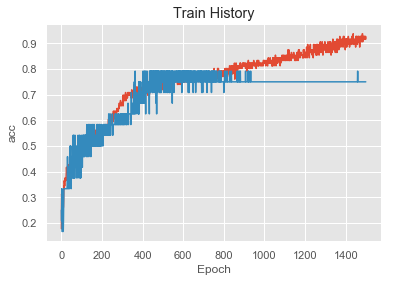

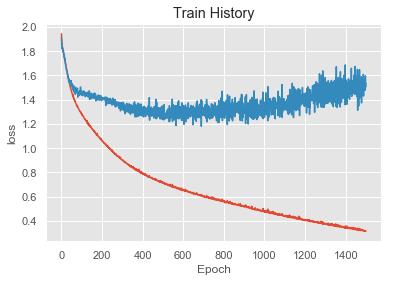

NameError: name 'model_m' is not defined

In [11]:

# %%

print("\n--- Reshape data to be accepted by Keras ---\n")

# Inspect x data
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'training samples')

print('y_train shape: ', y_train.shape)

# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
num_classes = 7


# Set input_shape / reshape for Keras
input_shape = (num_time_periods*num_sensors)   
x_train = x_train.reshape(x_train.shape[0], input_shape)   

print('x_train shape:', x_train.shape)
print('input_shape:', input_shape)

# Convert type for Keras otherwise Keras cannot process the data
x_train = x_train.astype("float32")
y_train = y_train.astype("float32")

# %%

# One-hot encoding of y_train labels (only execute once!)
y_train_oneshot = np_utils.to_categorical(y_train, num_classes)


## 分成訓練跟測試
x_train_used = x_train[0:120,]
y_train_used_oneshot = y_train_oneshot[0:120,]
x_test_used = x_train[121:,]
y_test_used_oneshot = y_train_oneshot[121:,]

print("\n--- Create neural network model ---\n")


######################################################
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
model.add(Dense(units=256, input_dim=12, kernel_initializer="normal", activation="relu"))
model.add(Dense(units=7, kernel_initializer="normal", activation="softmax"))
print(model.summary())
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

train_history = model.fit(x=x_train_used, y= y_train_used_oneshot, validation_split=0.2, epochs=1500, batch_size=10, verbose=2)


get_ipython().magic('matplotlib inline')
## IPython有一組預先定義好的所謂的魔法函數（Magic Functions），你可以通過命令列的語法形式來訪問它們。

import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()

show_train_history(train_history, "acc", "val_acc") ## 訓練正確率圖

show_train_history(train_history, "loss", "val_loss") ## 訓練誤差圖

###############################


scores = model_m.evaluate(x_test_used, y_test_used_oneshot)

print("Accuracy: {}%".format(scores[1]))


results = model_m.predict_classes(x_test_used)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train[121:,], results)
cm



# 